<a href="https://colab.research.google.com/github/arko-sys/XAI-Interpretable-ML/blob/main/regression_interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590.01.Fa25 -> Interpretable ML

In [1]:
import pandas as pd
import numpy as np

## Data Loading and Preprocessing

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df["customerID"].nunique()

7043

The `customerID` column is being dropped because it serves as a unique identifier for each customer and does not provide any meaningful analytical value for modeling or insights.

Retaining it could lead to unnecessary complexity in data processing, and since it's not a feature that influences churn prediction, removing it simplifies the dataset without losing relevant information.

In [5]:
df.drop(columns=["customerID"], inplace=True)

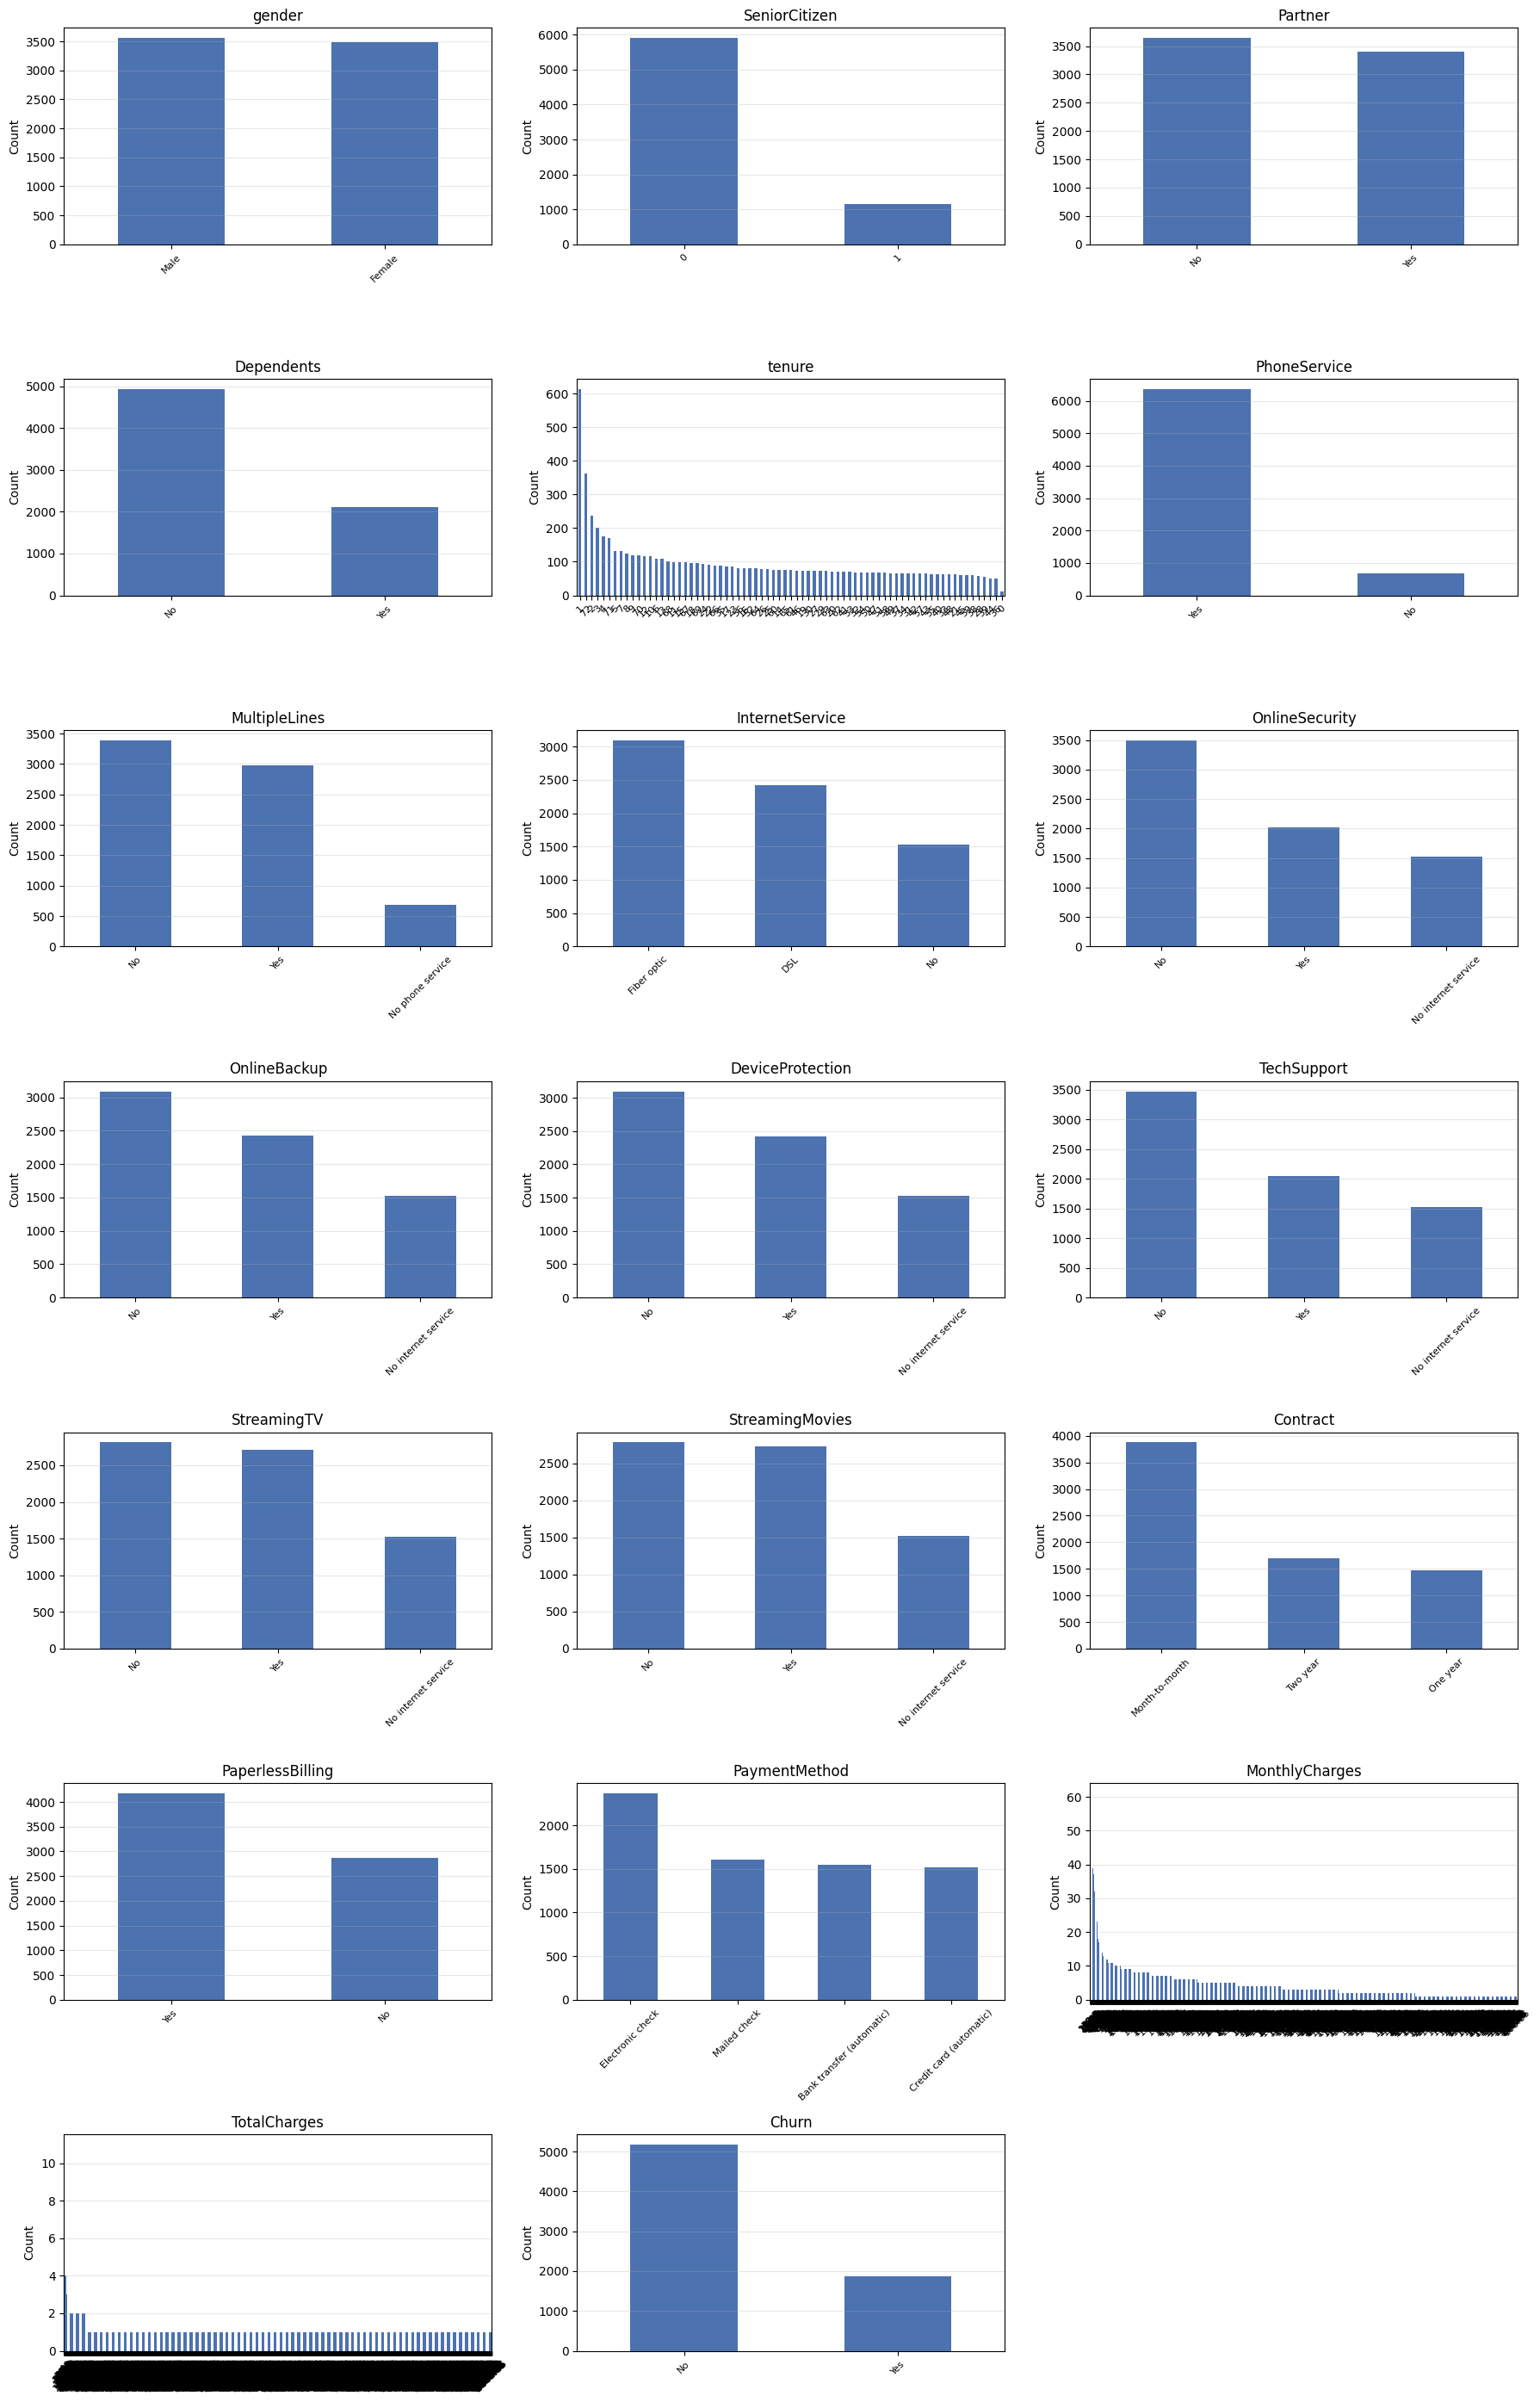

In [6]:
import matplotlib.pyplot as plt

cols = df.columns
n = len(cols)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 4))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    df[col].value_counts(dropna=False).plot(kind="bar", ax=ax, color="#4C72B0")
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=45, labelsize=8)
    ax.grid(axis="y", alpha=0.3)

for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Based on the value count analysis, `tenure`, `MonthlyCharges`, and `TotalCharges` seem to be continuous variables, and the rest seem to be categorical variables.

In [7]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df[df["TotalCharges"].isna() | df["TotalCharges"].astype(str).str.strip().eq("")]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


TotalCharges is being treated as an object type since it has empty string values present.

Converting these empty strings to NaN values.

In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [11]:
df.dropna(inplace=True)

### Encoding categorical variables

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [13]:
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,True,False,True,True,False,True,False,False,True,False
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,True,False,True,True,False,True,True,False,False,False
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,True,True


In [14]:
df_encoded = df_encoded.astype(float)
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,34.0,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,2.0,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.0,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,24.0,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0.0,72.0,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0.0,11.0,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1.0,4.0,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [15]:
# Drop a dummy column for each categorical feature ( > 2 categories) to avoid the dummy variable trap
cols_to_drop = [
    "OnlineSecurity_No internet service",
    "MultipleLines_No phone service",
    "PhoneService_Yes",
    "InternetService_No",
    "StreamingTV_No internet service",
    "DeviceProtection_No internet service",
    "OnlineBackup_No internet service",
    "TechSupport_No internet service",
    "StreamingMovies_No internet service",
]

drop_in_encoded = [c for c in cols_to_drop if c in df_encoded.columns]
df_encoded.drop(columns=drop_in_encoded, inplace=True)

## Exploratory Data Analysis

### Linearity Check

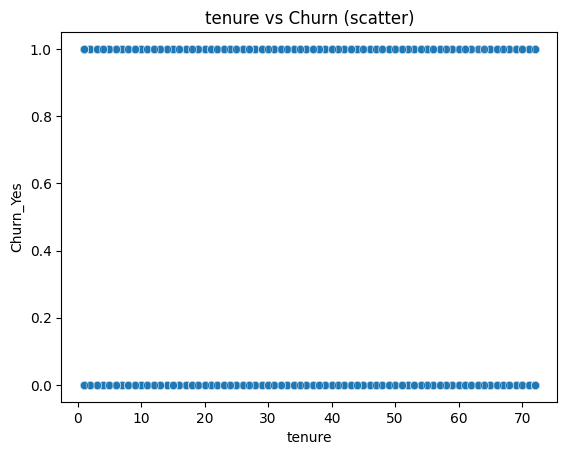

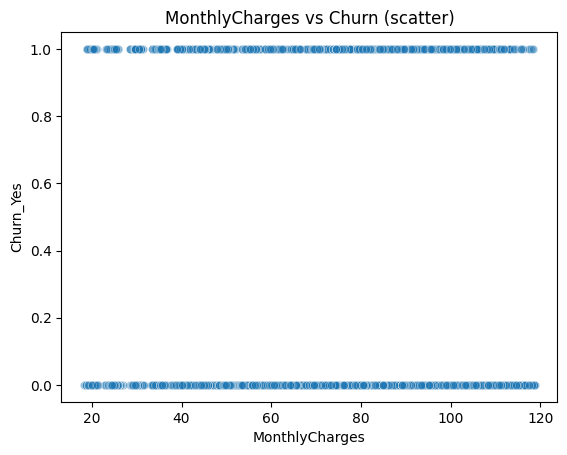

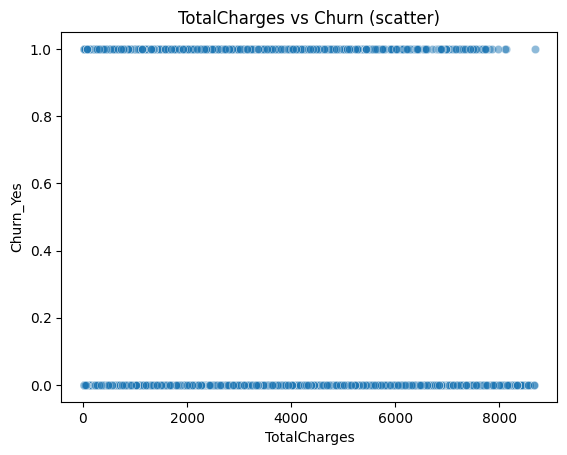

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cell 1: Scatter plots of predictors vs churn
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_cols:
    sns.scatterplot(x=df_encoded[col], y=df_encoded["Churn_Yes"], alpha=0.5)
    plt.title(f"{col} vs Churn (scatter)")
    plt.show()

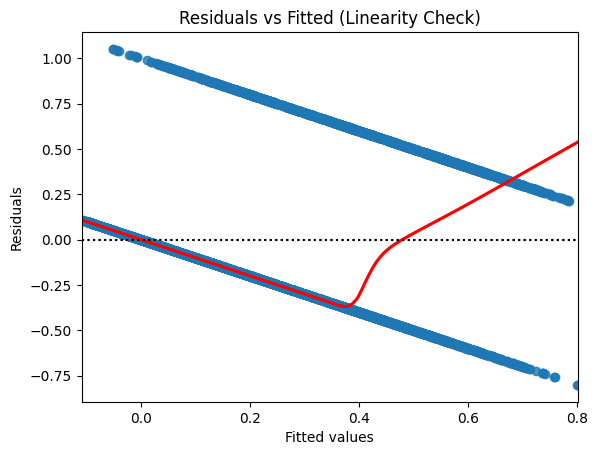

In [17]:
import statsmodels.api as sm

# Cell 2: Residual plots from OLS
y = df_encoded["Churn_Yes"].astype(int)
X = df_encoded[num_cols]
X_const = sm.add_constant(X)

ols_model = sm.OLS(y, X_const).fit()

sns.residplot(
    x=ols_model.fittedvalues, y=ols_model.resid, lowess=True, line_kws={"color": "red"}
)
plt.axhline(0, color="black", linestyle="dotted")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Linearity Check)")
plt.show()

At low fitted values, residuals are slightly positive.

Around 0.4, the line dips negative.

At higher fitted values, residuals swing positive again.

In [18]:
# Cell 3: RESET test for specification error
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(ols_model, power=2, use_f=True)
print("RESET Test (H0 = correctly specified):", reset_test)

RESET Test (H0 = correctly specified): <F test: F=102.00495299236226, p=8.048601946584537e-24, df_denom=7.03e+03, df_num=1>


H₀ (null): Model is correctly specified.

Result: F = 102, p ≈ 8e-24 → Reject H₀.

Meaning: The model is not correctly specified. Something important is missing: nonlinear effects, interactions, or wrong functional form.

In conclusion, the tests show that the linearity assumption is violated.
The OLS model in its current form is misspecified and needs either nonlinear terms or a different modeling approach.

#### Fit Full Model for later tests

In [19]:
# Full model: all predictors (numeric + dummy cols)
X_full = df_encoded.drop(columns=["Churn_Yes"])
X_full_const = sm.add_constant(X_full)

ols_full = sm.OLS(y, X_full_const).fit()
print(ols_full.summary())

                            OLS Regression Results                            
Dep. Variable:              Churn_Yes   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     128.4
Date:                Mon, 15 Sep 2025   Prob (F-statistic):               0.00
Time:                        04:55:27   Log-Likelihood:                -3088.2
No. Observations:                7032   AIC:                             6220.
Df Residuals:                    7010   BIC:                             6371.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Independence of Observations Check

Durbin-Watson: 2.008153266698411


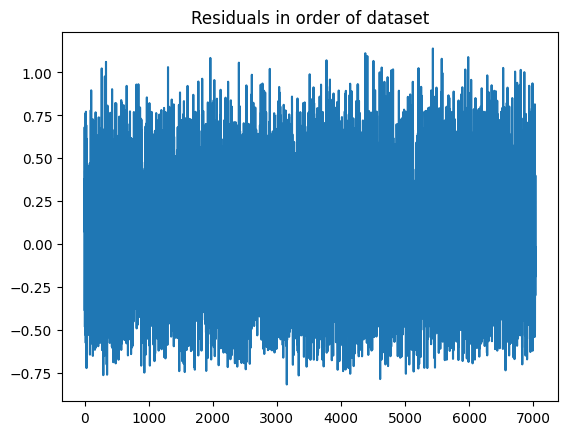

In [20]:
# Cell 4: Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

print("Durbin-Watson:", durbin_watson(ols_full.resid))

# Plot residuals in order
plt.plot(ols_full.resid.values)
plt.title("Residuals in order of dataset")
plt.show()

The residuals look randomly scattered across the dataset order (no systematic trend, no clumping).

This suggests no obvious time dependence or sequencing issue.

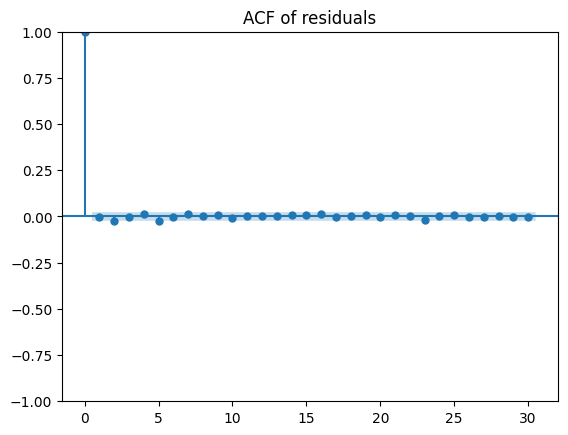

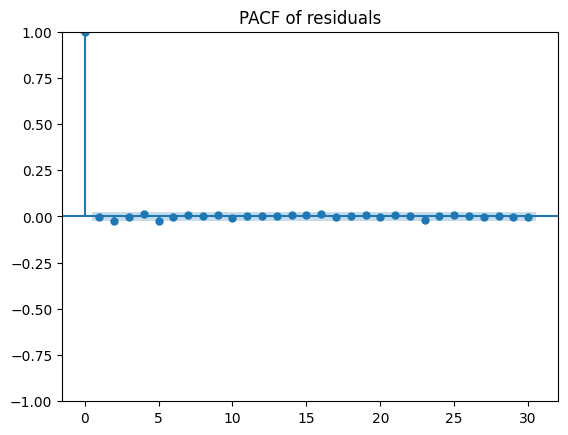

In [21]:
# Cell 5: ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ols_full.resid, lags=30)
plt.title("ACF of residuals")
plt.show()

plot_pacf(ols_full.resid, lags=30)
plt.title("PACF of residuals")
plt.show()

Aside from the spike at lag 0 (always = 1), all other autocorrelations hover around zero and stay within the confidence bands.

That means residuals are not correlated with their lagged values.

In [22]:
# Cell 6: Breusch-Godfrey test
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

bg_test = acorr_breusch_godfrey(ols_full, nlags=5)
print("Breusch-Godfrey test (LM stat, p-value, F stat, F p-value):", bg_test)

Breusch-Godfrey test (LM stat, p-value, F stat, F p-value): (np.float64(11.087012858966123), np.float64(0.049681809178378354), 2.2123768011167737, 0.05029012532338592)


Null hypothesis (H₀): No autocorrelation up to the tested lag.

Result: p > 0.05 → Fail to reject H₀.

Meaning: There is no statistical evidence of autocorrelation in the residuals.

In conclusion, the residuals appear independent. We don’t need to worry about autocorrelation in this dataset.

### Homoscedasticity (Constant Variance) Check

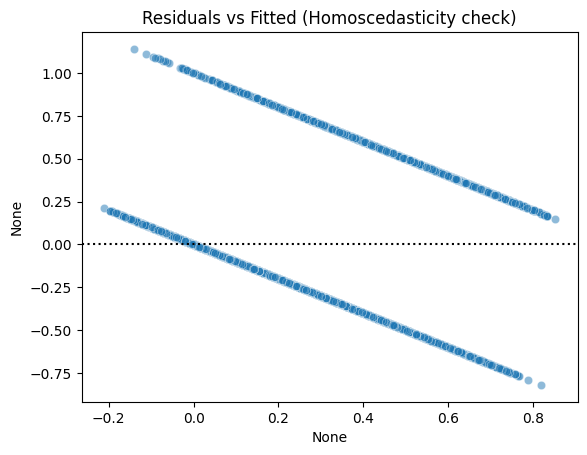

In [23]:
# Cell 7: Residuals vs Fitted (already above, but for variance patterns)
sns.scatterplot(x=ols_full.fittedvalues, y=ols_full.resid, alpha=0.5)
plt.axhline(0, color="black", linestyle="dotted")
plt.title("Residuals vs Fitted (Homoscedasticity check)")
plt.show()

The residuals seem to form clear bands. This hints at heteroscedasticity — variance changes depending on fitted values.

In [24]:
# Cell 8: Breusch-Pagan, White, and Goldfeld-Quandt tests
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt

bp_test = het_breuschpagan(ols_full.resid, X_const)
white_test = het_white(ols_full.resid, X_const)
gq_test = het_goldfeldquandt(ols_full.resid, X_const)

print("Breusch-Pagan (LM stat, LM pval, F stat, F pval):", bp_test)
print("White test (LM stat, LM pval, F stat, F pval):", white_test)
print("Goldfeld-Quandt test (F stat, p-value, alternative):", gq_test)

Breusch-Pagan (LM stat, LM pval, F stat, F pval): (np.float64(965.9715961688918), np.float64(4.33315467088676e-209), np.float64(373.0528953445801), np.float64(7.687970209555445e-225))
White test (LM stat, LM pval, F stat, F pval): (np.float64(1164.1486117986299), np.float64(6.648687176207296e-245), np.float64(154.79168724701717), np.float64(4.456889146638296e-268))
Goldfeld-Quandt test (F stat, p-value, alternative): (np.float64(1.0650059247224517), np.float64(0.031028504476800563), 'increasing')


Both Breusch–Pagan and White tests strongly reject H₀.

The Goldfeld–Quandt test alone doesn’t find significance, but given the other evidence, heteroscedasticity is present.

### Normality of Residuals

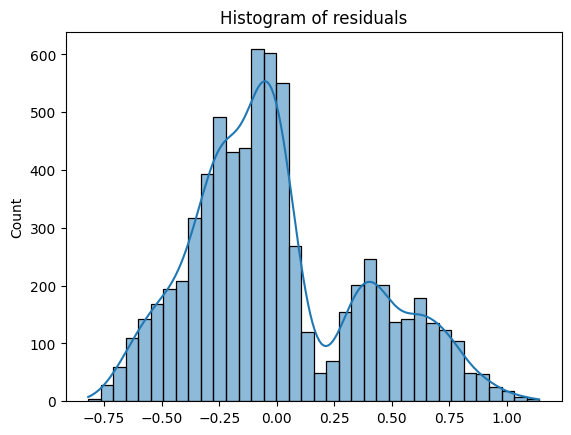

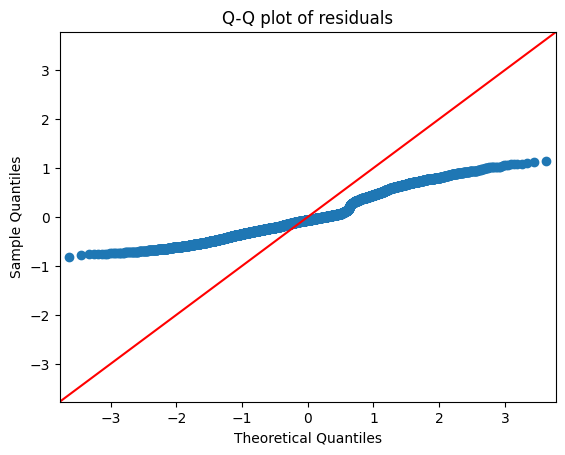

In [25]:
# Cell 9: Histogram & Q-Q plot
sns.histplot(ols_full.resid, kde=True)
plt.title("Histogram of residuals")
plt.show()

sm.qqplot(ols_full.resid, line="45")
plt.title("Q-Q plot of residuals")
plt.show()

In the histogram, instead of a bell-shaped curve, we see multi-modality / skewness.

There are two distinct clusters

This suggests residuals are not normally distributed.

In the QQ plot, if residuals were normal, points would closely follow the red 45° line.

Here, points deviate systematically:

S-shaped bend → non-normality.

Heavy tails / skewness present.

In [26]:
# Cell 10: Shapiro-Wilk, KS, Anderson-Darling, Jarque-Bera
from scipy.stats import shapiro, kstest, normaltest, anderson, jarque_bera

print("Shapiro-Wilk:", shapiro(ols_full.resid))
print("Kolmogorov-Smirnov:", kstest(ols_full.resid, "norm"))
print("D'Agostino (similar to Jarque-Bera):", normaltest(ols_full.resid))
print("Anderson-Darling:", anderson(ols_full.resid))
print("Jarque-Bera:", jarque_bera(ols_full.resid))

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9585100511328173), pvalue=np.float64(9.111421737815445e-41))
Kolmogorov-Smirnov: KstestResult(statistic=np.float64(0.24632330455910054), pvalue=np.float64(0.0), statistic_location=np.float64(-0.6220839704455521), statistic_sign=np.int8(-1))
D'Agostino (similar to Jarque-Bera): NormaltestResult(statistic=np.float64(374.66833261971067), pvalue=np.float64(4.383341423662367e-82))
Anderson-Darling: AndersonResult(statistic=np.float64(114.64041651167463), critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(-2.1570913428621473e-14), scale=np.float64(0.37542487978080047))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Jarque-Bera: SignificanceResult(statistic=np.float64(409.0885619915276), pvalue=np.float64(1.4707791298803692e-89))


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  res = hypotest_fun_out(*samples, **kwds)


All tests converge on the same conclusion: residuals are not normally distributed.

### Multicollinearity Check

In [27]:
# VIF for full predictor set
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_full_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_full_const.values, i)
    for i in range(X_full_const.shape[1])
]
print(vif_data.sort_values("VIF", ascending=False).head(20))

                                  feature        VIF
0                                   const  36.498367
3                          MonthlyCharges  18.168780
4                            TotalCharges  10.706800
2                                  tenure   7.548716
9             InternetService_Fiber optic   6.997820
17                      Contract_Two year   2.532131
14                        StreamingTV_Yes   2.188547
15                    StreamingMovies_Yes   2.187888
20         PaymentMethod_Electronic check   1.967305
21             PaymentMethod_Mailed check   1.847752
13                        TechSupport_Yes   1.735336
12                   DeviceProtection_Yes   1.680664
10                     OnlineSecurity_Yes   1.676218
8                       MultipleLines_Yes   1.646715
11                       OnlineBackup_Yes   1.626594
16                      Contract_One year   1.584072
19  PaymentMethod_Credit card (automatic)   1.560999
6                             Partner_Yes   1.

Biggest concern: MonthlyCharges and TotalCharges (high redundancy).

Moderate concern: tenure and InternetService_Fiber optic.

Everything else: Safe (VIF < 5).

### Influential Outliers Check

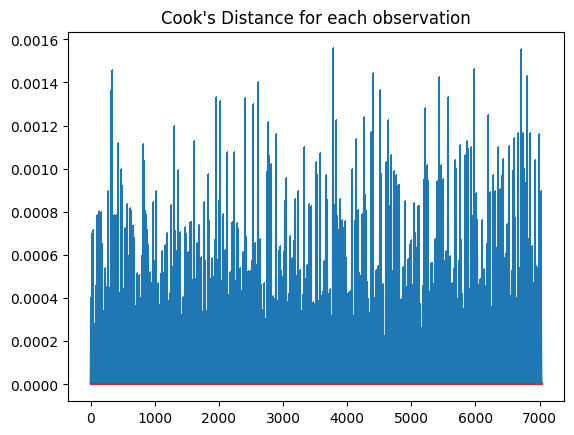

Influential points (Cook’s D > 4/n): [18, 31, 104, 131, 168, 173, 268, 317, 320, 335, 358, 402, 430, 481, 494, 543, 572, 594, 608, 610]


In [28]:
# Cell 13: Cook's distance
influence = ols_full.get_influence()
cooks_d = influence.cooks_distance[0]

plt.stem(range(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance for each observation")
plt.show()

# Threshold rule of thumb: > 4/n
n = len(df)
influential_points = [i for i, d in enumerate(cooks_d) if d > 4 / n]
print("Influential points (Cook’s D > 4/n):", influential_points[:20])  # show first 20

All Cook’s D values are well below 1.

A few points are above 4/n, but still very small (< 0.003).

No extreme influential points. Some mild influence, but not problematic.

In [29]:
# Cell 14: Studentized residuals & DFBETAS
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(ols_full)
print("Studentized residuals (first 10):", influence.resid_studentized[:10])
print("DFBETAS (first 10 rows):")
print(influence.dfbetas[:10])

Studentized residuals (first 10): 0   -1.021385
1   -0.073544
2    1.813231
3    0.186641
4    1.013221
5    0.662445
6   -1.288397
7   -0.499714
8    1.134964
9    0.333267
dtype: float64
DFBETAS (first 10 rows):
[[-2.53899977e-02  9.25079402e-03  2.37348178e-02  2.01652734e-02
  -1.60846269e-02  1.17852372e-02 -2.57281856e-02  1.74055366e-02
  -2.12332303e-03 -5.26779161e-03 -1.32980282e-03 -2.91684265e-02
  -1.80186748e-03 -1.64865584e-03 -2.47848956e-03 -2.87848917e-03
   2.08814287e-03 -2.01204390e-03 -1.30271297e-02  1.68807060e-04
  -1.33040802e-02  8.55733965e-03]
 [ 1.62009996e-03  9.42402514e-05 -6.83811506e-04 -1.92887230e-03
   4.75491564e-04 -8.11520053e-04  6.49955612e-04  4.89840049e-04
   1.05183474e-03  1.54583955e-03 -5.40369657e-04  1.33196478e-03
  -9.71802837e-04  1.71163189e-03  1.22523384e-03  1.32540986e-03
  -1.46646863e-03 -2.54708581e-04  6.80545635e-04  5.88341852e-05
  -2.31758116e-04 -1.38490474e-03]
 [-1.51824056e-02 -6.26875619e-03 -5.91393187e-03  1.897

Studentized residuals: no large outliers.

DFBETAS: no observations strongly affecting coefficients.

Dataset seems free from problematic influential outliers.

## Linear Regression

In [30]:
y = df_encoded["Churn_Yes"]
X = df_encoded.drop(columns=["Churn_Yes"])

X = sm.add_constant(X)

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# Fit model with robust SE (HC3) to account for heteroscedasticity
model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())

                                  feature        VIF
0                                   const  36.498367
1                           SeniorCitizen   1.148782
2                                  tenure   7.548716
3                          MonthlyCharges  18.168780
4                            TotalCharges  10.706800
5                             gender_Male   1.001801
6                             Partner_Yes   1.462506
7                          Dependents_Yes   1.380259
8                       MultipleLines_Yes   1.646715
9             InternetService_Fiber optic   6.997820
10                     OnlineSecurity_Yes   1.676218
11                       OnlineBackup_Yes   1.626594
12                   DeviceProtection_Yes   1.680664
13                        TechSupport_Yes   1.735336
14                        StreamingTV_Yes   2.188547
15                    StreamingMovies_Yes   2.187888
16                      Contract_One year   1.584072
17                      Contract_Two year   2.

Perform Lasso regression

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


lasso = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=42))


lasso.fit(X, y)

coefs = lasso.named_steps["lassocv"].coef_
features = X.columns

lasso_results = pd.DataFrame({"feature": features, "coefficient": coefs})

print("Optimal alpha:", lasso.named_steps["lassocv"].alpha_)
print(lasso_results.sort_values(by="coefficient", key=abs, ascending=False))

Optimal alpha: 0.0013602997020208797
                                  feature  coefficient
4                            TotalCharges    -0.103370
3                          MonthlyCharges     0.088446
9             InternetService_Fiber optic     0.049454
16                      Contract_One year    -0.048983
2                                  tenure    -0.046914
17                      Contract_Two year    -0.041019
20         PaymentMethod_Electronic check     0.036904
18                   PaperlessBilling_Yes     0.025091
13                        TechSupport_Yes    -0.021023
10                     OnlineSecurity_Yes    -0.019426
1                           SeniorCitizen     0.018042
15                    StreamingMovies_Yes     0.015147
14                        StreamingTV_Yes     0.013445
7                          Dependents_Yes    -0.010158
8                       MultipleLines_Yes     0.010107
11                       OnlineBackup_Yes    -0.007077
21             PaymentMethod

In [32]:
print("R2 of Lasso:", lasso.score(X, y))

R2 of Lasso: 0.2776894008611912


## Logistic Regression

In [33]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = make_pipeline(
    StandardScaler(), LogisticRegression(penalty=None, max_iter=5000)
)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[923 110]
 [171 203]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1033
         1.0       0.65      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407


ROC-AUC: 0.8324683829353268


In [34]:
from sklearn.linear_model import LogisticRegressionCV

lasso_logit = make_pipeline(
    StandardScaler(),
    LogisticRegressionCV(
        cv=5,
        penalty="l1",  # Lasso penalty
        solver="saga",  # saga solver supports l1
        max_iter=5000,
        scoring="roc_auc",
        random_state=42,
    ),
)

lasso_logit.fit(X, y)

best_model = lasso_logit.named_steps["logisticregressioncv"]

print("Best C (inverse of regularization strength):", best_model.C_)

coefs = best_model.coef_[0]
lasso_results = pd.DataFrame(
    {
        "feature": X.columns,
        "coefficient": coefs,
        "odds_ratio": np.exp(coefs),
    }
).sort_values(by="coefficient", key=abs, ascending=False)

print("\nLasso Logistic Regression Coefficients:\n", lasso_results)

y_pred = lasso_logit.predict(X)
y_prob = lasso_logit.predict_proba(X)[:, 1]

print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("ROC-AUC:", roc_auc_score(y, y_prob))

Best C (inverse of regularization strength): [21.5443469]

Lasso Logistic Regression Coefficients:
                                   feature  coefficient  odds_ratio
2                                  tenure    -1.286682    0.276186
17                      Contract_Two year    -0.637939    0.528380
4                            TotalCharges     0.517060    1.677090
16                      Contract_One year    -0.308048    0.734880
3                          MonthlyCharges     0.270982    1.311251
9             InternetService_Fiber optic     0.231177    1.260082
18                   PaperlessBilling_Yes     0.195811    1.216296
20         PaymentMethod_Electronic check     0.170071    1.185389
10                     OnlineSecurity_Yes    -0.163626    0.849060
13                        TechSupport_Yes    -0.159442    0.852619
1                           SeniorCitizen     0.097075    1.101943
15                    StreamingMovies_Yes     0.095319    1.100009
14                        Str

## Generalized Additive Model (GAM)

In [36]:
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.1 MB/s eta 0:00:00


In [37]:
from pygam import LogisticGAM
from pygam import s, f


continuous = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical = [col for col in X.columns if col not in continuous]
col_index = {col: i for i, col in enumerate(X.columns)}

# Build term list
_term_list = []
for fname in X.columns:
    if fname in continuous:
        _term_list.append(s(col_index[fname]))  # spline for continuous
    else:
        _term_list.append(f(col_index[fname]))  # factor for categorical

# Combine into a TermList
terms = _term_list[0]
for t in _term_list[1:]:
    terms = terms + t


gam = LogisticGAM(terms=terms, fit_intercept=True, max_iter=2000)
gam = gam.fit(X, y)


lams = np.logspace(-3, 3, 7)
gam = gam.gridsearch(X, y, lam=lams)

print("GAM lambda:", gam.lam)
print("ROC-AUC:", roc_auc_score(y, gam.predict_proba(X)))

gam.summary()

100% (7 of 7) |##########################| Elapsed Time: 0:00:14 Time:  0:00:14


GAM lambda: [[np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)], [np.float64(10.0)]]
ROC-AUC: 0.8543052403885862
LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     39.7043
Link Function:                        LogitLink Log Likelihood:                                 -2854.1234
Number of Samples:                         7032 AIC:                                       

/tmp/ipython-input-3027959017.py:33: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


## Model Comparison

### Performance

GAM achieved the highest ROC-AUC (0.854), meaning it captures the best separation ability between churners vs non-churners.

Logistic regression is slightly behind (0.843) but gives a full confusion matrix and strong interpretability.

Linear regression is not directly suitable for classification; coefficients can show correlations but ROC/accuracy comparison isn’t valid.

### Interpretability

Lasso Logistic Regression:

Provides clear coefficients → odds ratios make interpretation straightforward.
Example: tenure (odds ratio 0.28) strongly reduces churn risk, while Electronic check (odds ratio 1.18) increases churn risk.
Sparse model (many small coefficients shrink to ~0), enhancing interpretability.


GAM:

Balances interpretability with flexibility.
Shows non-linear effects (smooth functions for tenure, MonthlyCharges, TotalCharges), which logistic regression cannot.
But caution: reported p-values are unreliable due to smoothing parameter estimation (per warnings).


Linear Regression:

Simpler, shows relative contributions, but mis-specified for a binary target.
Coefficients indicate directionality but lack odds ratio meaning.

### Feature Effects

GAM:

Smooth terms (splines) for continuous features (tenure, MonthlyCharges, TotalCharges) reveal non-linear churn patterns.
Example: churn risk may decline steeply with tenure early on but level off later.


Logistic Regression:

Linear assumption; may miss non-linear relationships.
Captures categorical effects well (e.g., Contract_Two year strongly protective).


Linear Regression:

Similar to logistic but coefficients aren’t on probability scale → less meaningful.

### Complexity & Practical Use

GAM:

Best for balanced trade-off between predictive performance and interpretability of non-linear patterns.
Slightly more complex to explain to non-technical stakeholders.

Logistic Regression (Lasso):

Easiest to explain.
Strong interpretability (odds ratios).
Slightly lower predictive power vs GAM.

Linear Regression:

Not recommended for classification, but can be used as a baseline or for quick feature screening.

### Synopsis

For business interpretability → use Lasso Logistic Regression (clear odds ratios, acceptable performance).

For pattern discovery & slightly higher performance → use GAM (captures non-linearities, ROC-AUC best).

Use linear regression only for exploratory feature relevance, not as a final churn model.